# Frequency Distributions of All Time and Controversial's Post Titles (Top 100 posts)

In [1]:
# Other libraries
import pandas as pd

# PRAW libraries
import praw
from praw.models import MoreComments

# NLTK libraries
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

#email: v1167316@nwytg.net
#client_id: knz0l49j5bVGMA
#client_secret: tmRkuDCl9AzIAs3UxDkTiCjEIXs

# initializing our API
reddit = praw.Reddit(client_id='knz0l49j5bVGMA',
                     client_secret='tmRkuDCl9AzIAs3UxDkTiCjEIXs',
                     user_agent='STA 160 Project')

# removing unnecessary words such as "I", "me", etc
stop_words = set(stopwords.words("english"))

# words to remove from our word frequency plots
banned_words = ['a', 'just', 'my', 'is', "n't", 'at', 'when', 'you', "'re", 'the', '.', '"', '?', 'really',
               'get', "''", ',', "'s", "...", "``", '”', "'m", "’", "'ll", "(", ")", "’", "!", "'s", "“", 
               ":", "'ve", "'", "deleted", '[', ']', '&', '#', 'x200b', ';', 'wan', 'na']

# adding to our stop_words list
for i in banned_words:
    stop_words.add(i)

# choosing our subreddit
subreddit = reddit.subreddit('depression')

In [2]:
# list for our post titles
all_time_titles = []
controversial_titles = []

# appends the titles of the first 100 posts to a list
for submission in subreddit.top(limit=100):
    all_time_titles.append(submission.title)
            
for submission in subreddit.controversial(limit=100):
    controversial_titles.append(submission.title)

In [3]:
# converting to lowercase
all_time_titles = [k.lower() for k in all_time_titles]
controversial_titles = [k.lower() for k in controversial_titles]

# converting to dataframe so it is easier to tokenize
all_time_titles_df = pd.DataFrame(all_time_titles)
controversial_titles_df = pd.DataFrame(controversial_titles)

# Combining text into 1 string for tokenization
text_all_time_titles = ' '.join(all_time_titles_df[0])
text_controversial_titles = ' '.join(controversial_titles_df[0])

# Tokenizing each text to prep for a frequency distribution
tokenized_all_time_titles = word_tokenize(text_all_time_titles)
tokenized_controversial_titles = word_tokenize(text_controversial_titles)

# filtered text w/o unnecessary words
filtered_all_time_titles = []
filtered_controversial_titles = []

In [4]:
# Filtering out noise to gauge the trending topics better
for w in tokenized_all_time_titles:
    if w not in stop_words:
        filtered_all_time_titles.append(w)

for w in tokenized_controversial_titles:
    if w not in stop_words:
        filtered_controversial_titles.append(w)

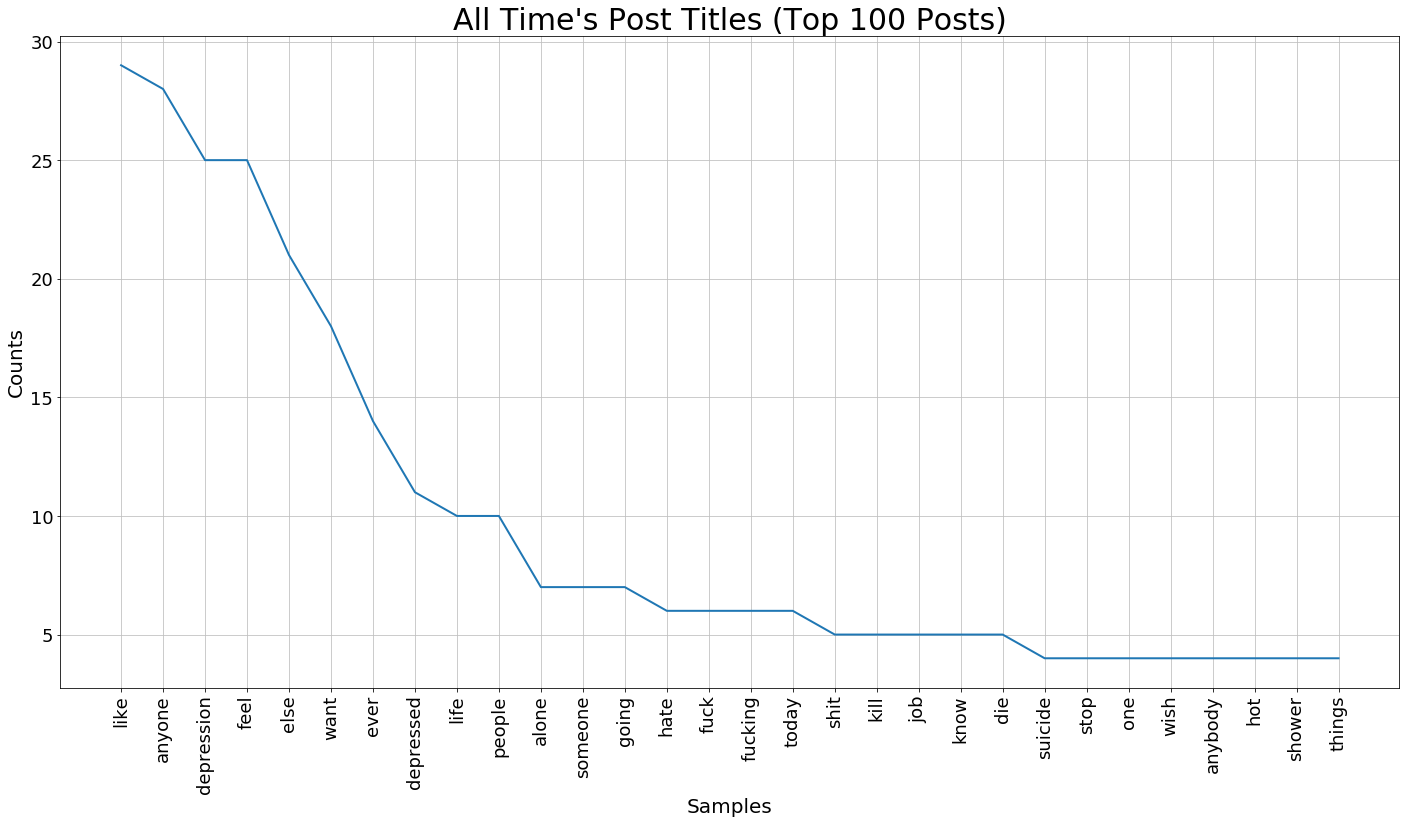

<Figure size 432x288 with 0 Axes>

In [5]:
# Setting up a frequency distribution plot to get an idea of the most common words    
plt.figure(figsize = (24, 12))
fdist_all_time = FreqDist(filtered_all_time_titles)
fdist_all_time.most_common(2)
plt.title("All Time's Post Titles (Top 100 Posts)", fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fdist_all_time.plot(30,cumulative=False)
plt.savefig('WordFrequencyTop.png')

When analyzing the top 100 post titles in all time, some notable words such as "like", "depression", "feel", "depressed", "alone", "hate", "fuck", "fucking", "shit", "kill", "die", and "suicide" were found. The sample size for the frequency of the top 100 post titles is less than or equal to 30. Upon further investigation, the words "like", "feel", "alone", and "depression" were used in a context to relate to other people on the subreddit. For example, in many cases it was used to see if anyone else has experienced what they are going through. As for the words: "hate", "fuck", "fucking", "shit", "kill", "suicide" and "die" these were typically associated with life being unfair and talks of suicide were mentioned. It is interesting to note that on the "All Time" section that out of the top 100 post titles, only 5 talked about dying and 2 talked about suicide.

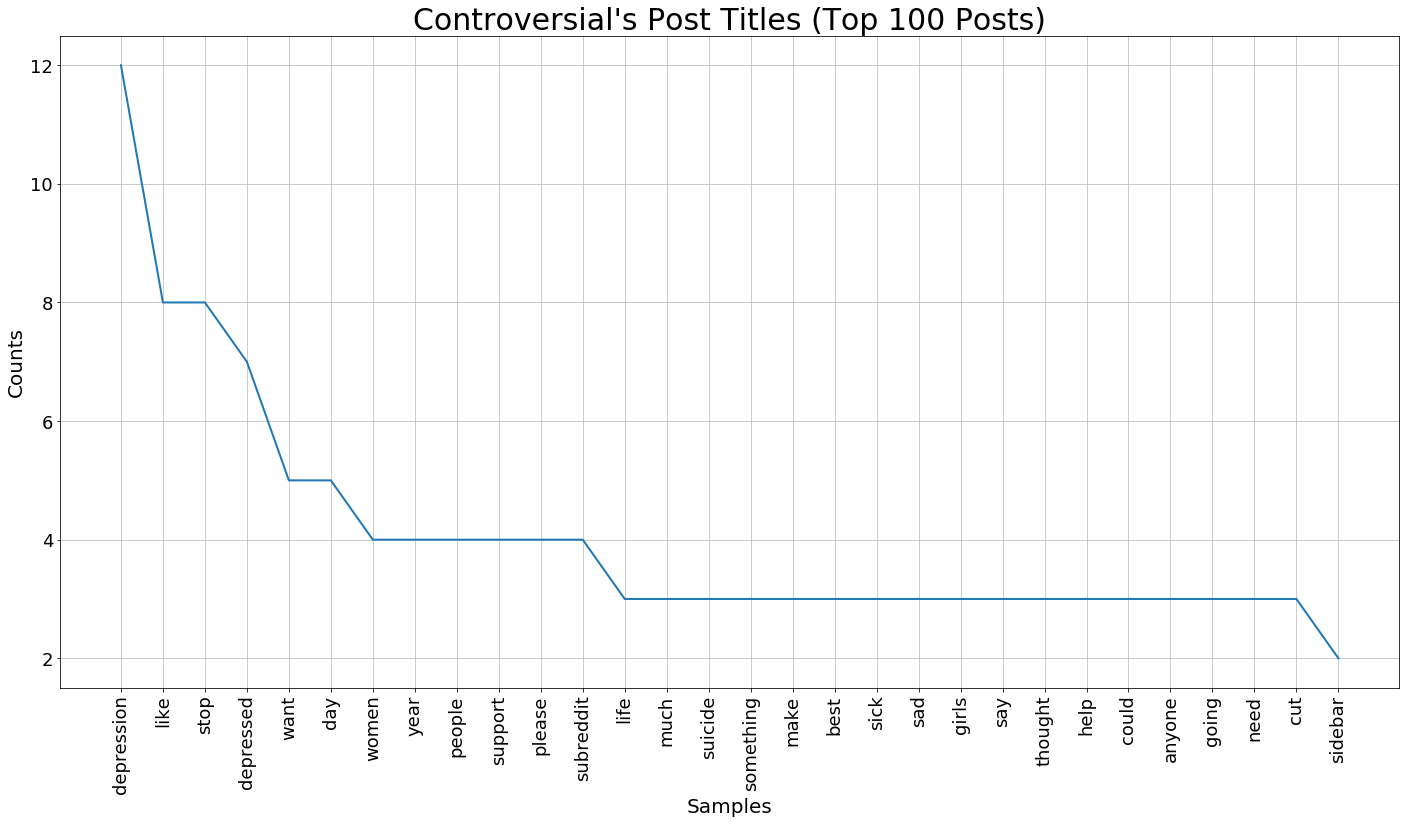

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize = (24, 12))
fdist_controversial = FreqDist(filtered_controversial_titles)
fdist_controversial.most_common(2)
plt.title("Controversial's Post Titles (Top 100 Posts)", fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fig = fdist_controversial.plot(30,cumulative=False)
plt.savefig('WordFrequencyControversial.png')

As for analysis of the top 100 post titles in controversial, some notable words such as "depression", "like", "depressed", "women", "girls" were found. The sample size for the frequency of the top 100 post titles is less than or equal to 12. It is important to note that the frequency of words are more split since our sample size is low especially when compared to "All Time". Similarly to "All Time", the words "depression", "like", and "depressed" were used in a similar fashion. The most interesting part was that 4 post titles were associated with the word "women" and 3 post titles were associated with the word "girls". This could mean that problems related to depression may be associated with one's romantic life. Additionally, it is likely that the subreddit has a higher majority of men than women.

# Frequency Distributions of All Time and Controversial's top level comments (Top 100 posts)

In [7]:
# list of IDs
all_time_id = []
controversial_id = []

# list of comments
all_time_top_comments = []
controversial_top_comments = []

# appends the titles of the first 100 all time and controversial posts to a list
for submission in subreddit.top(limit=100):
    all_time_id.append(submission.id)
            
for submission in subreddit.controversial(limit=100):
    controversial_id.append(submission.id)

In [8]:
# gets a list of top comments from the top 100 posts in all time
for i in all_time_id:
    submission = reddit.submission(id=i)
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        all_time_top_comments.append(top_level_comment.body)

In [9]:
# gets a list of top comments from the top 100 posts in controversial
for i in controversial_id:
    submission = reddit.submission(id=i)
    for top_level_comment in submission.comments:
        if isinstance(top_level_comment, MoreComments):
            continue
        controversial_top_comments.append(top_level_comment.body)

In [10]:
# converting to lowercase
all_time_top_comments = [k.lower() for k in all_time_top_comments]
controversial_top_comments = [k.lower() for k in controversial_top_comments]

# converting to dataframe so it is easier to tokenize
all_time_top_comments_df = pd.DataFrame(all_time_top_comments)
controversial_top_comments_df = pd.DataFrame(controversial_top_comments)

# Combining text into 1 string for tokenization
text_all_time_top_comments = ' '.join(all_time_top_comments_df[0])
text_controversial_top_comments = ' '.join(controversial_top_comments_df[0])

# Tokenizing each text to prep for a frequency distribution
tokenized_all_time_top_comments = word_tokenize(text_all_time_top_comments)
tokenized_controversial_top_comments = word_tokenize(text_controversial_top_comments)

# filtered text w/o unnecessary words
filtered_all_time_top_comments = []
filtered_controversial_top_comments = []

In [11]:
# Filtering out noise to gauge the trending topics better
for w in tokenized_all_time_top_comments:
    if w not in stop_words:
        filtered_all_time_top_comments.append(w)

for w in tokenized_controversial_top_comments:
    if w not in stop_words:
        filtered_controversial_top_comments.append(w)

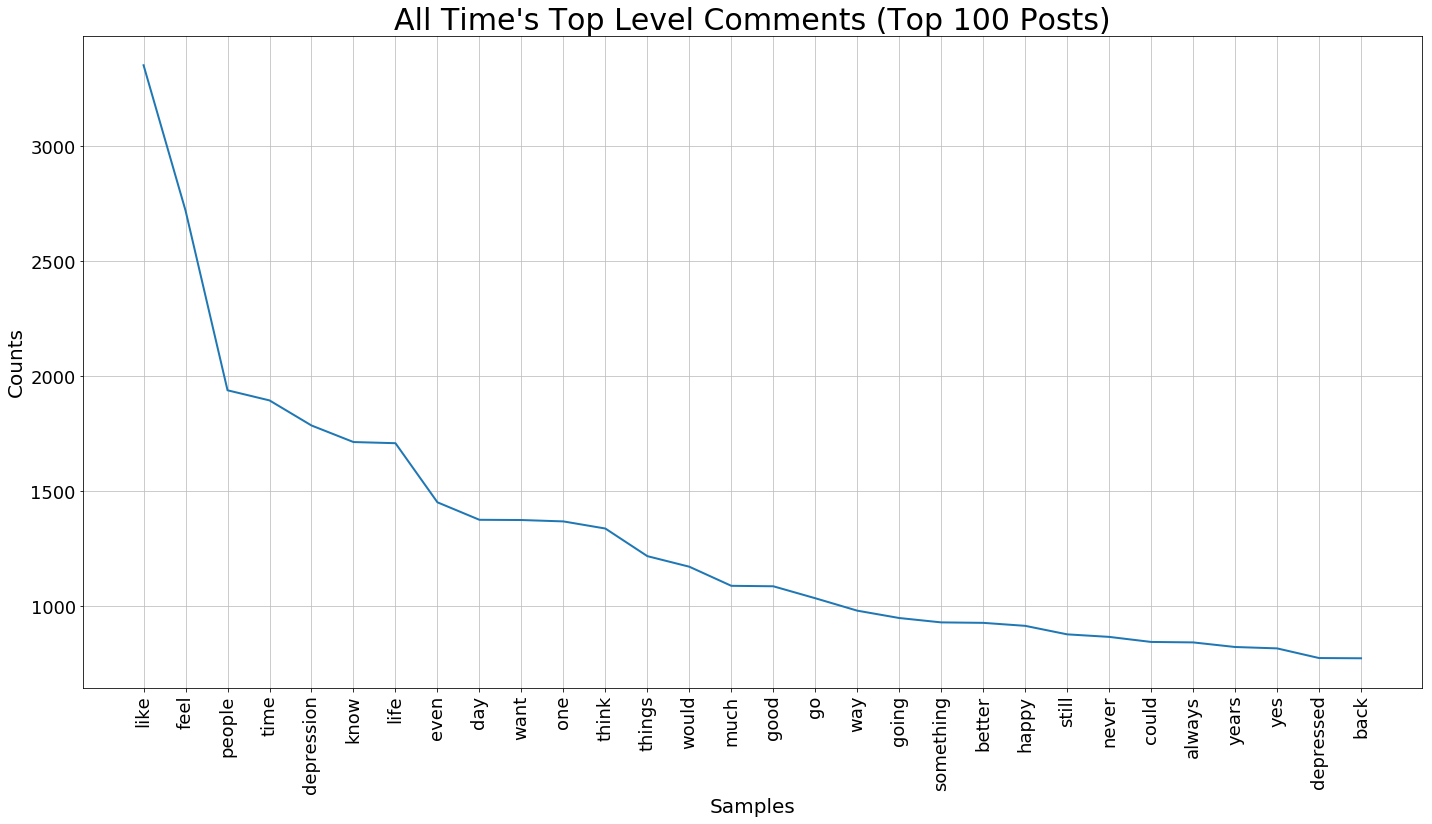

<Figure size 432x288 with 0 Axes>

In [12]:
# Setting up a frequency distribution plot to get an idea of the most common words    
plt.figure(figsize = (24, 12))
fdist_all_time = FreqDist(filtered_all_time_top_comments)
fdist_all_time.most_common(2)
plt.title("All Time's Top Level Comments (Top 100 Posts)", fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fdist_all_time.plot(30,cumulative=False)
plt.savefig('WordFrequencyTop.png')

In the analysis of the top 100 top comments in all time, similarly to "All Time", words such as "like", "feel", "time", "depression", "life", and "happy" were used. This time our sample size is around 3,500 comments for word frequencies. The words "feel" and "like" are used together regularly in cases such as "Does anyone feel like..." or something similar. Most of these words are used in a context that is associated with depression. For example, you may think the word "happy" might go against the theme of the subreddit but it is used in a context to describe how unhappy the poster is.

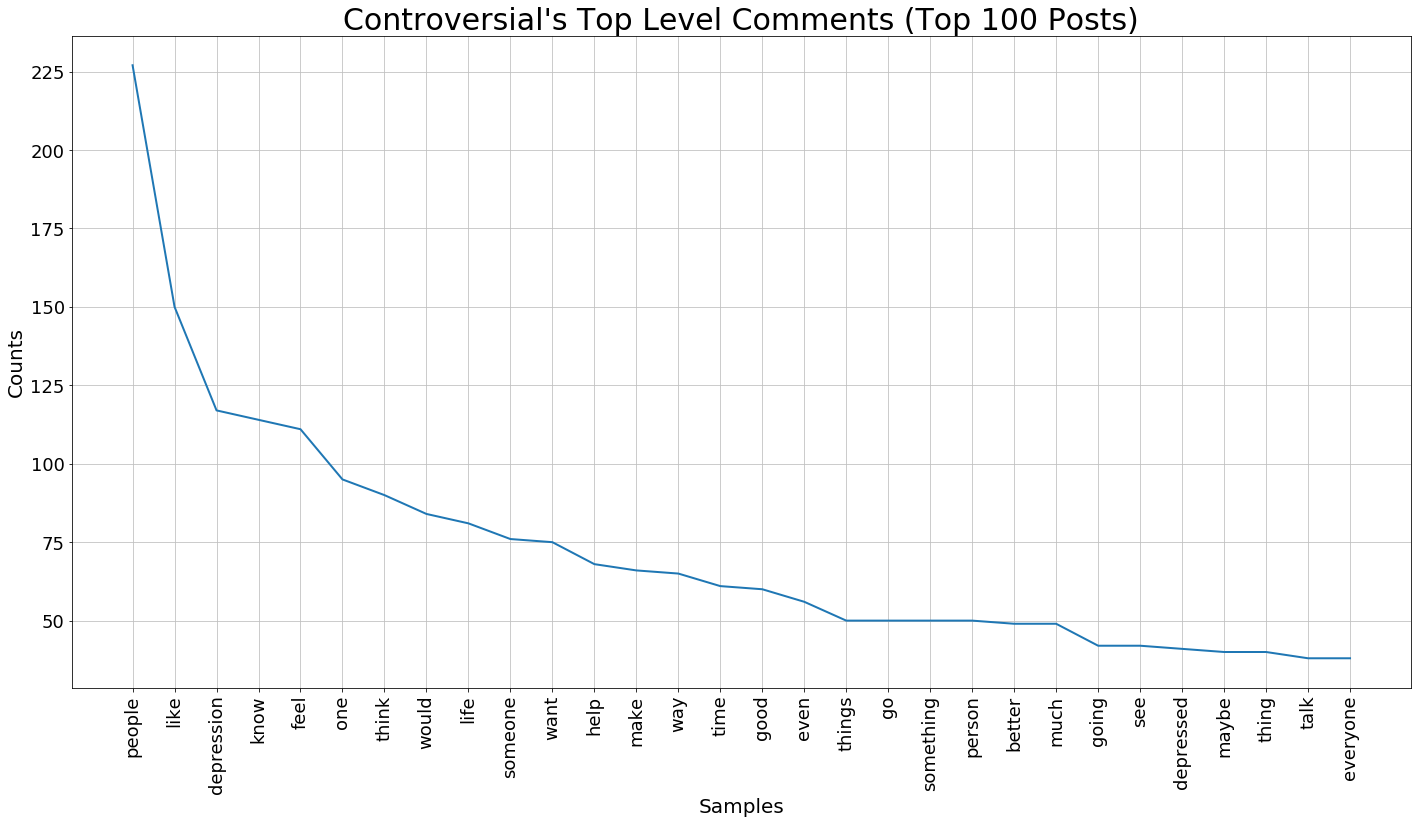

<Figure size 432x288 with 0 Axes>

In [13]:
# Setting up a frequency distribution plot to get an idea of the most common words    
plt.figure(figsize = (24, 12))
fdist_all_time = FreqDist(filtered_controversial_top_comments)
fdist_all_time.most_common(2)

plt.title("Controversial's Top Level Comments (Top 100 Posts)", fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fdist_all_time.plot(30,cumulative=False)
plt.savefig('WordFrequencyTop.png')

In the analysis of the top 100 top comments in controversial, nothing notable was of interest. Similarly to our previous analyses, "like", "depression", "feel", "life" were used in a similar context. However, it is important to note that the sample size compared to "All Time" is significantly smaller. It is smaller than 230 word frequencies. It is evident that people do not comment a lot in the controversial section.

# Bigrams of All Time and Controversial's top level comments (Top 100 posts)

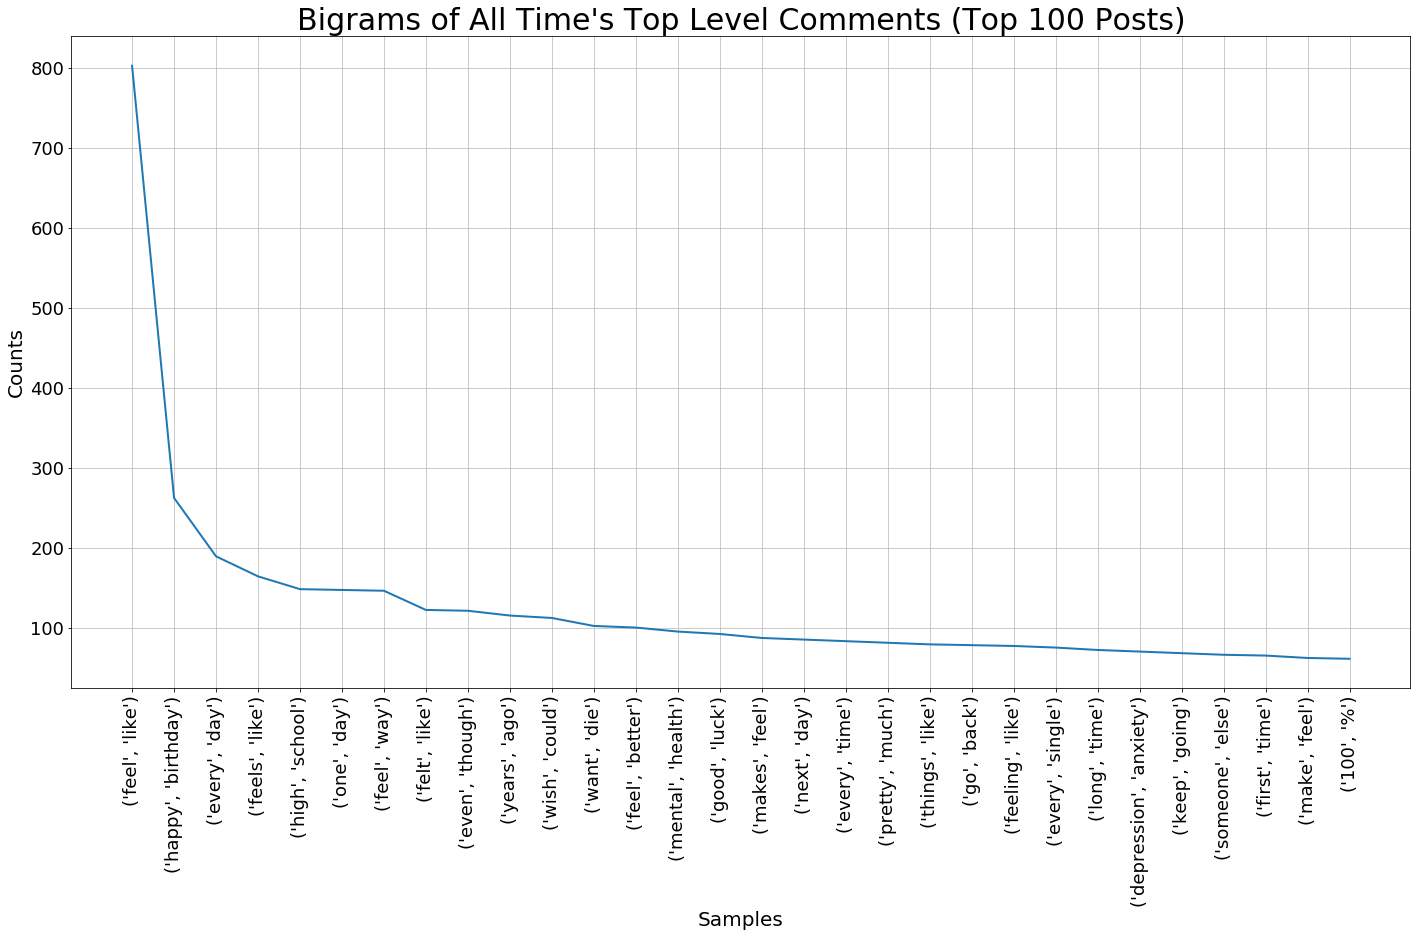

<Figure size 432x288 with 0 Axes>

In [14]:
# Creating bigrams
bgs_all_time_top_comments = nltk.bigrams(filtered_all_time_top_comments)

# Computing the frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs_all_time_top_comments)

# Plotting   
plt.figure(figsize = (24, 12))
fdist_all_time = FreqDist(fdist)
fdist_all_time.most_common(2)
plt.title("Bigrams of All Time's Top Level Comments (Top 100 Posts)", fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fdist_all_time.plot(30,cumulative=False)
plt.savefig('WordFrequencyTop.png')

In the bigrams of the top level comments in all time, these word combinations were used frequently: "feel like", "happy birthday", "every day", "one day", "years ago" were used. The sample size of our bigram is around 800. The word combination of "happy birthday" was an interesting phrase and something that was unexpected. Upon further investigation, it was used in a manner where people just said it was their birthday and people responding happy birthday. The phrase "years ago" was used in a context of nostalgia which can be tied to depression such as someone looking back to better times.

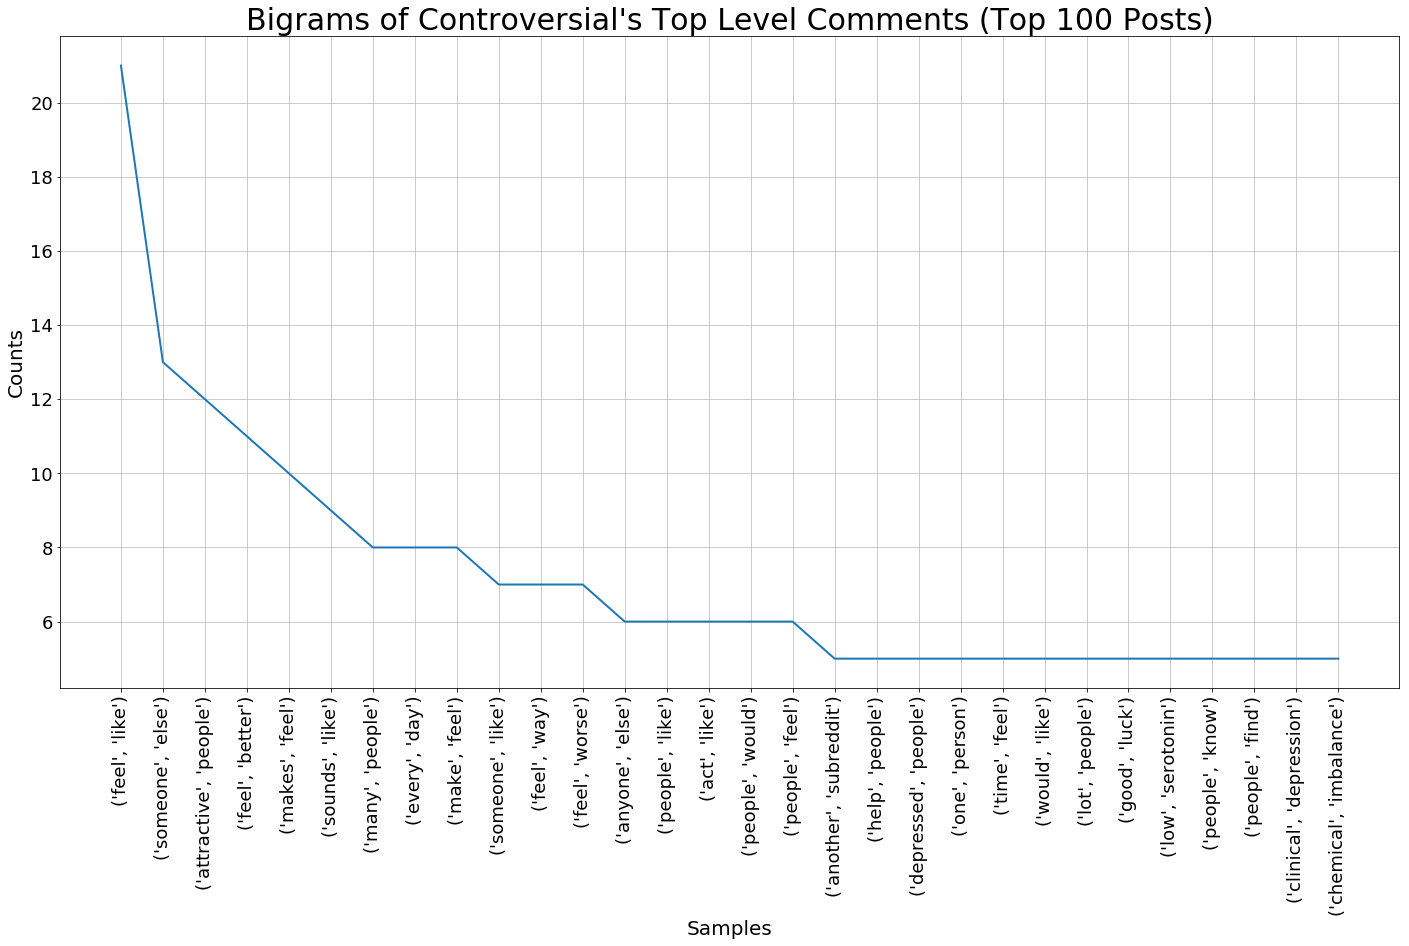

<Figure size 432x288 with 0 Axes>

In [15]:
# Creating bigrams
bgs_controversial_top_comments = nltk.bigrams(filtered_controversial_top_comments)

# Computing the frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs_controversial_top_comments)

# Plotting   
plt.figure(figsize = (24, 12))
fdist_all_time = FreqDist(fdist)
fdist_all_time.most_common(2)
plt.title("Bigrams of Controversial's Top Level Comments (Top 100 Posts)", fontsize = 30)
plt.xticks(size = 18)
plt.xlabel('xlabel', size = 20)
plt.yticks(size = 18)
plt.ylabel('ylabel', size = 20)
fdist_all_time.plot(30,cumulative=False)
plt.savefig('WordFrequencyTop.png')

In the bigrams of the top level comments in controversial, these word combinations were used frequently: "feel like", "attractive people", "feel better", "low serotonin", "chemical imbalance" were of interest. The sample size of our bigram is around 20. The word combination of "attractive people" is interesting because self-esteem issues may be associated with why someone feels depressed. In addition, "low serotonin" and "chemical imbalance" were of interest because it addresses the scientific aspect of depression.